# Prodigy Infotech DS Internship TASK #3

## Build a Decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data.

#### >>>Dataset Used-: Bank Marketing Dataset imported from UCI Machine Learning Repository

In [382]:
#Importing python libraries & Reading the .CSV file
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv("bank_data.csv")

### Previewing and Analysing Dataset

In [383]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [384]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [385]:
df.shape

(45211, 17)

In [386]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [387]:
df.rename(columns={'y':'term_deposit'}, inplace=True)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,term_deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [388]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           45211 non-null  int64 
 1   job           45211 non-null  object
 2   marital       45211 non-null  object
 3   education     45211 non-null  object
 4   default       45211 non-null  object
 5   balance       45211 non-null  int64 
 6   housing       45211 non-null  object
 7   loan          45211 non-null  object
 8   contact       45211 non-null  object
 9   day           45211 non-null  int64 
 10  month         45211 non-null  object
 11  duration      45211 non-null  int64 
 12  campaign      45211 non-null  int64 
 13  pdays         45211 non-null  int64 
 14  previous      45211 non-null  int64 
 15  poutcome      45211 non-null  object
 16  term_deposit  45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [389]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [390]:
df.nunique().sort_values() #Checking for unique values

term_deposit       2
loan               2
housing            2
default            2
contact            3
marital            3
poutcome           4
education          4
job               12
month             12
day               31
previous          41
campaign          48
age               77
pdays            559
duration        1573
balance         7168
dtype: int64

In [391]:
df.isnull().sum() #Checking for null/missing values

age             0
job             0
marital         0
education       0
default         0
balance         0
housing         0
loan            0
contact         0
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome        0
term_deposit    0
dtype: int64

In [392]:
## We see that the given dataset contains no null values

In [393]:
# Converting tearget categorical column [term_deposit] to numerical
df['term_deposit'] = df['term_deposit'].map({'no': 0, 'yes': 1})

## Data Visualisation

### Term Deposit

term_deposit
0    39922
1     5289
Name: count, dtype: int64

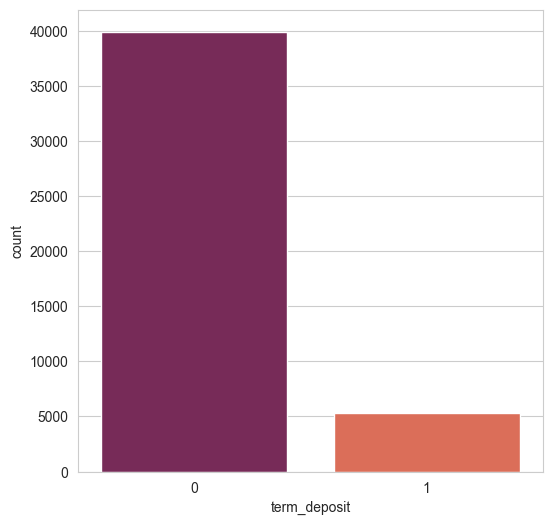

In [394]:
plt.figure(figsize=(6,6))
sns.set_style('whitegrid')
sns.countplot(x=df['term_deposit'], palette='rocket')
df['term_deposit'].value_counts()

The above plot clearly shows that number of people who purchased term deposit are significantly lower than the people who haven't purchased.

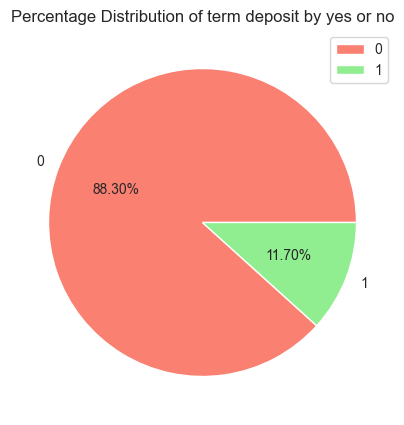

In [395]:
## Percentage Distribution of term deposit column through pie chart
plt.figure(figsize=(5,5))
plt.pie(df['term_deposit'].value_counts().values,labels=df['term_deposit'].value_counts().index,autopct='%.2f%%',colors=['salmon','lightgreen'])
plt.title('Percentage Distribution of term deposit by yes or no')
plt.legend()
plt.show()

### Age Column

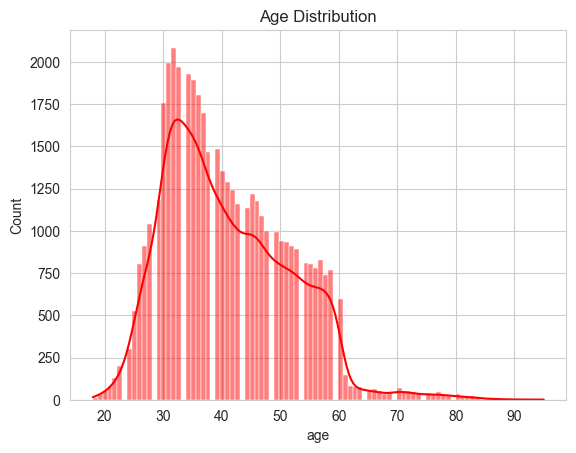

age
32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: count, Length: 77, dtype: int64

In [396]:
# Plotting age distribution
sns.histplot(x='age', data=df, kde=True,color='red')
plt.title('Age Distribution')
plt.show()
df['age'].value_counts()

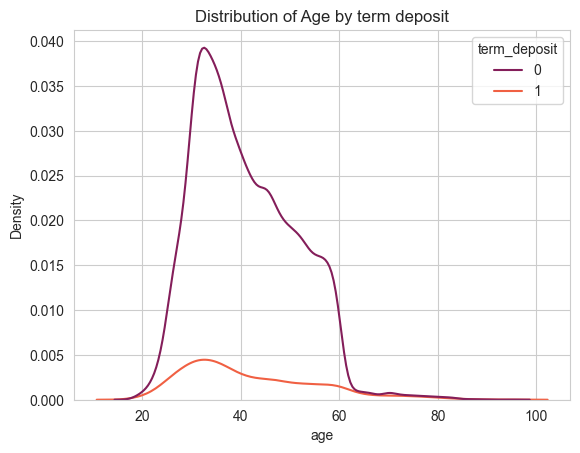

In [397]:
# Showing Distribution of Age as per term deposit
sns.kdeplot(x=df['age'],hue=df['term_deposit'], palette='rocket')
plt.title('Distribution of Age by term deposit')
plt.show()

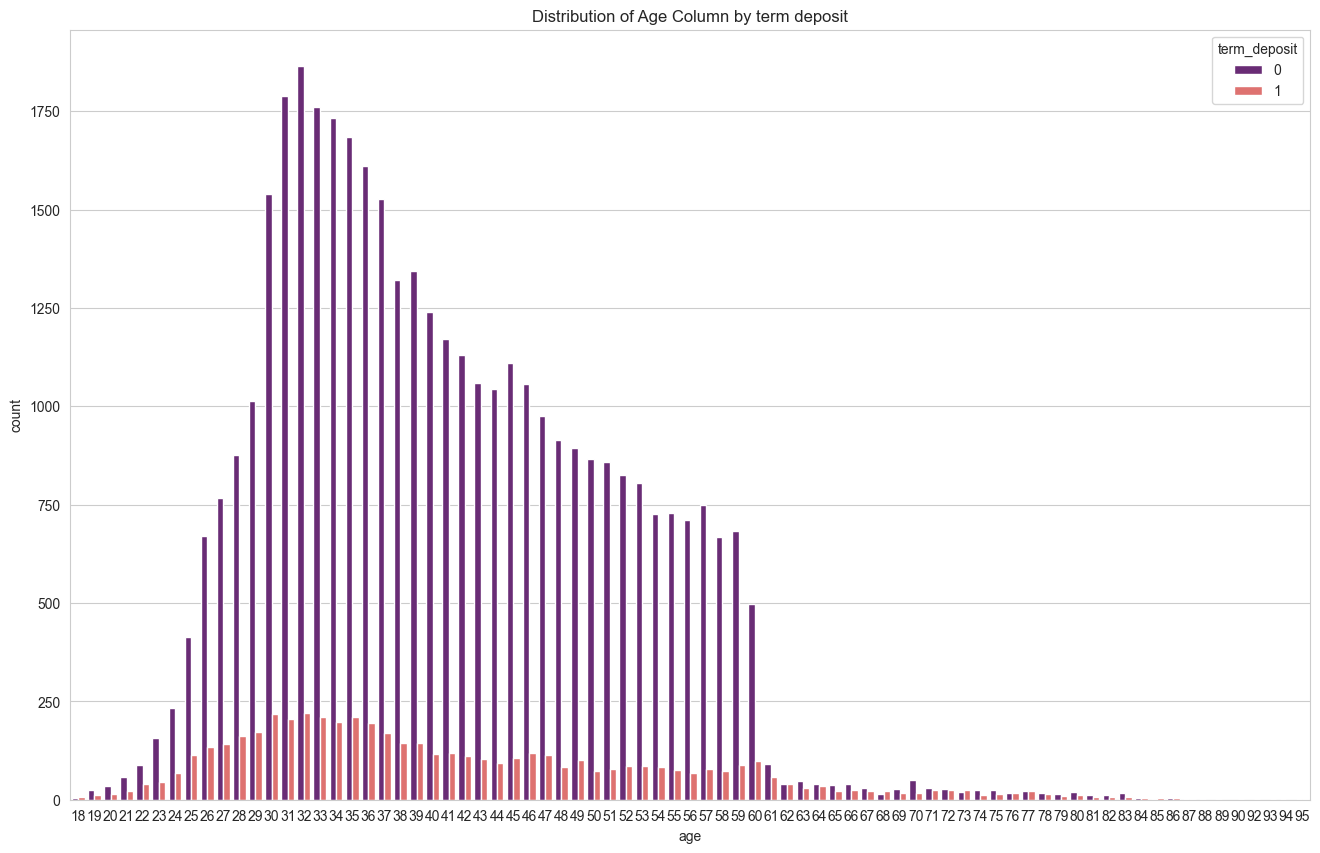

In [398]:
## Number of people by Age as per term deposit
plt.figure(figsize=(16,10))
sns.countplot(x='age',hue='term_deposit',data=df,palette='magma')
plt.title('Distribution of Age Column by term deposit')
plt.show()

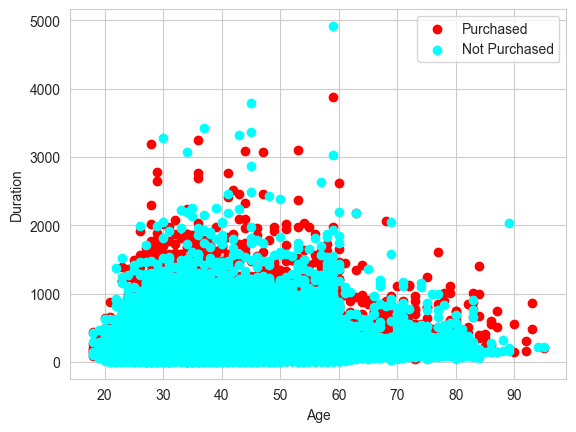

In [399]:
plt.scatter(x=df.age[df.term_deposit==1],y=df.duration[df.term_deposit==1],c='red')
plt.scatter(x=df.age[df.term_deposit==0],y=df.duration[df.term_deposit==0],c='cyan')
plt.legend(['Purchased' , 'Not Purchased'])
plt.xlabel('Age')
plt.ylabel('Duration')
plt.show()

In [400]:
## Percentage distribution of age by term deposit
df.groupby(['age'])['term_deposit'].mean()*100

age
18     58.333333
19     31.428571
20     30.000000
21     27.848101
22     31.007752
         ...    
90    100.000000
92    100.000000
93    100.000000
94      0.000000
95     50.000000
Name: term_deposit, Length: 77, dtype: float64

### Job Column

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

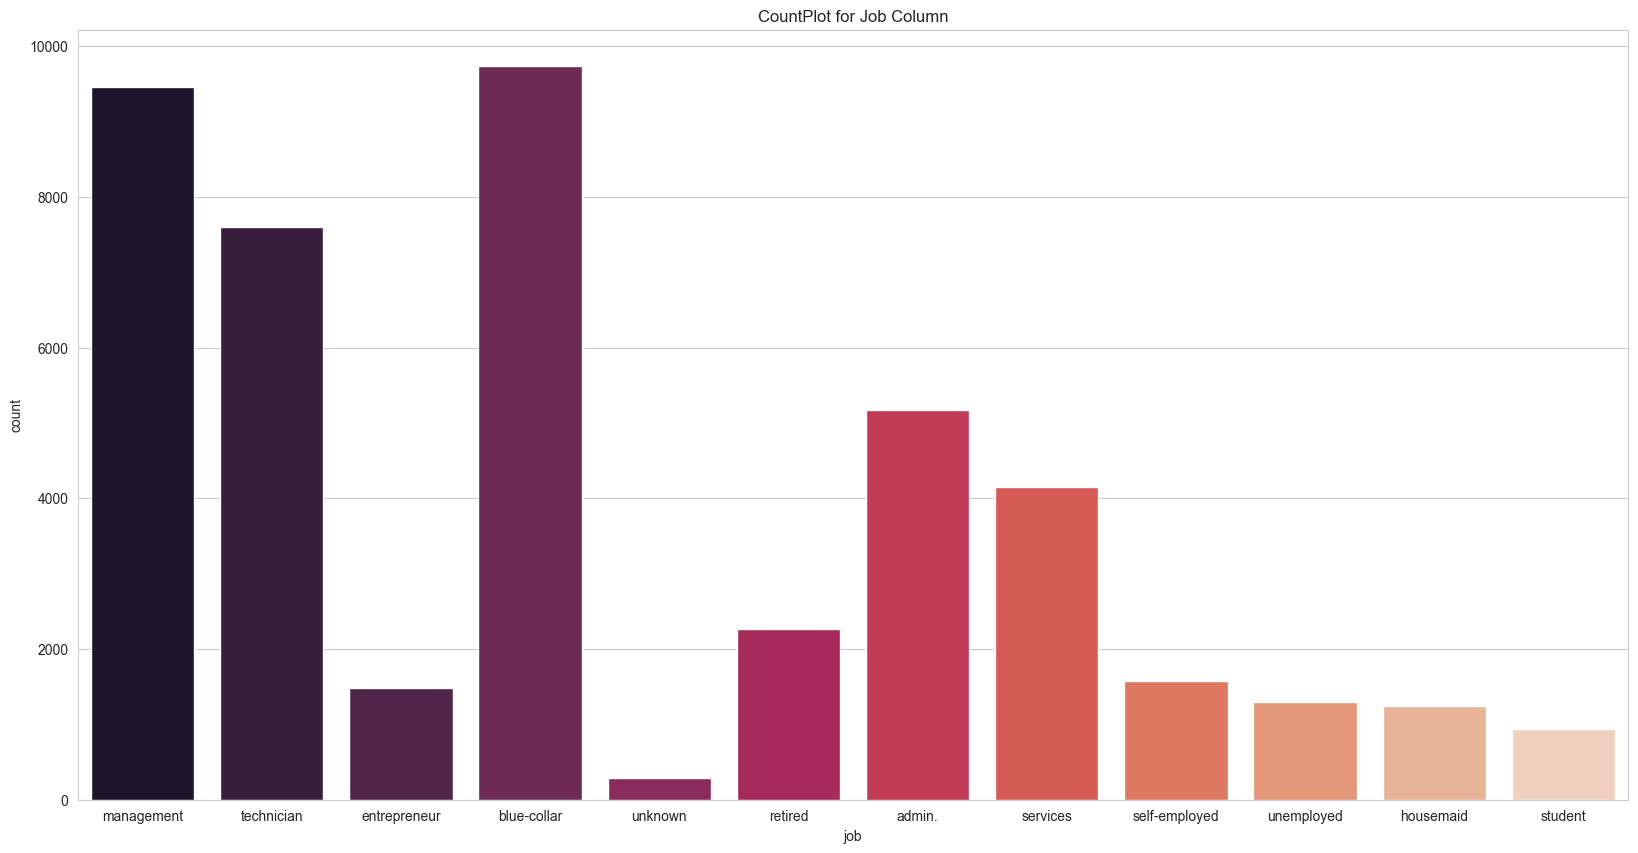

In [401]:
plt.figure(figsize=(20,10))
sns.set_style('whitegrid')
sns.countplot(x=df['job'], palette='rocket')
plt.title('CountPlot for Job Column')
df['job'].value_counts()

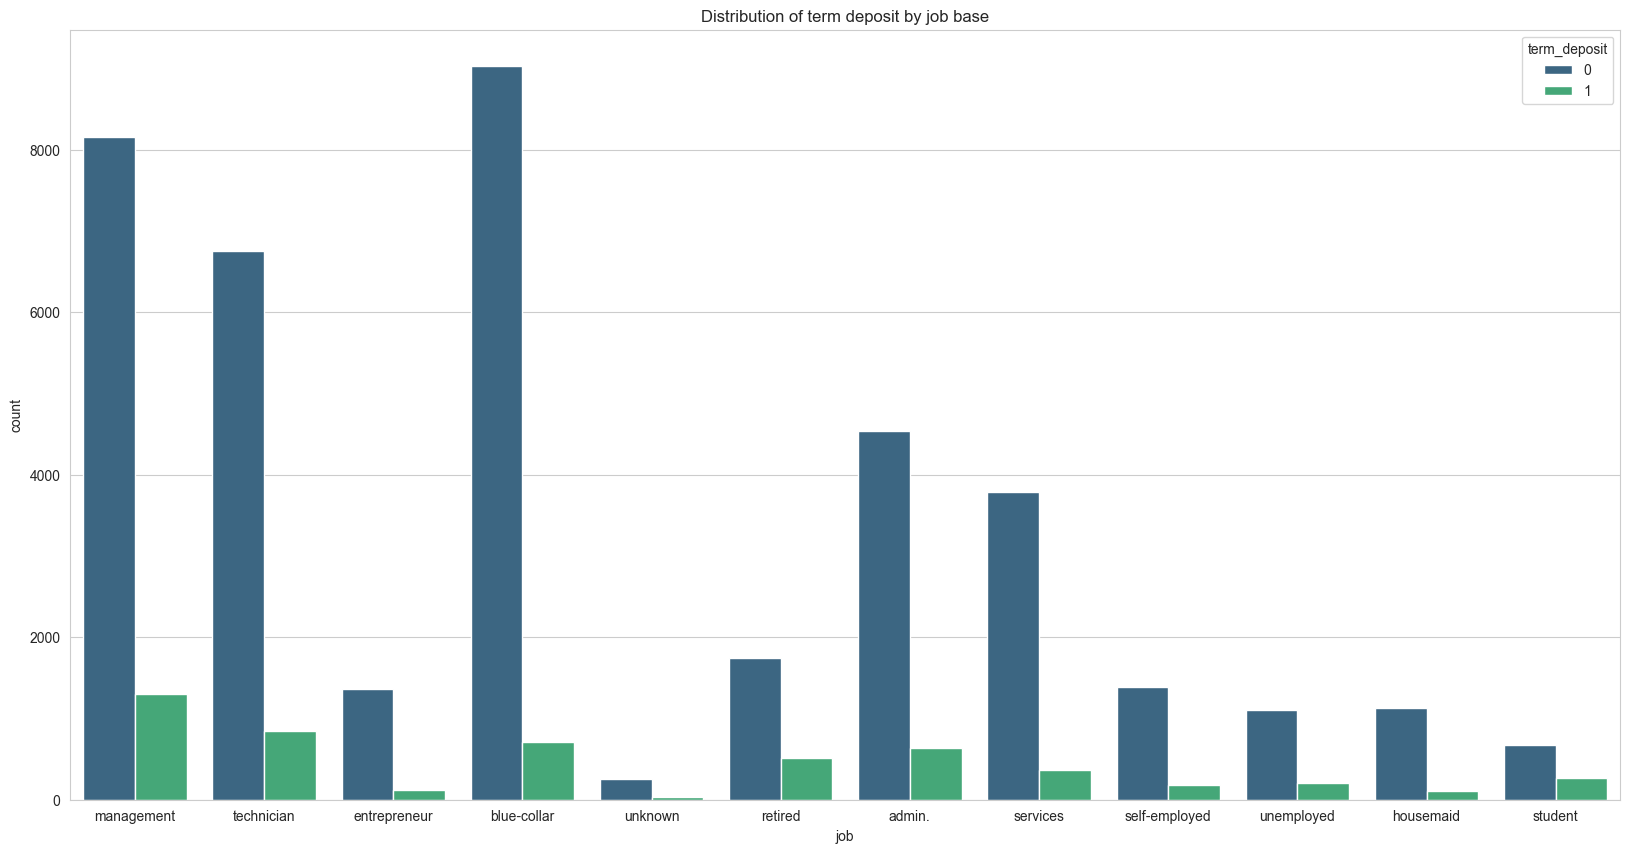

In [402]:
## Number of term deposit by job base
plt.figure(figsize=(20,10))
sns.countplot(x='job',hue='term_deposit',data=df, palette='viridis')
plt.title('Distribution of term deposit by job base')
plt.show()

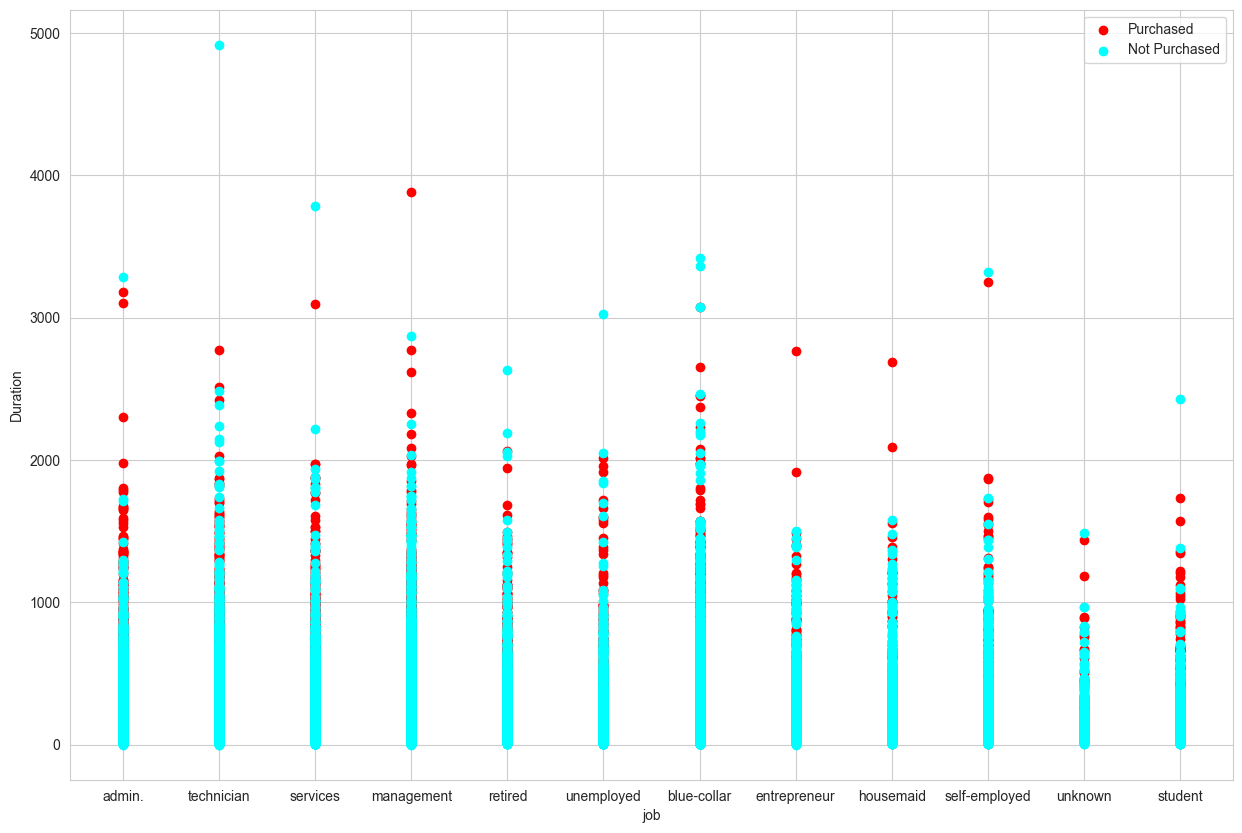

In [403]:
plt.figure(figsize=(15,10))
plt.scatter(x=df.job[df.term_deposit==1],y=df.duration[df.term_deposit==1],c='red')
plt.scatter(x=df.job[df.term_deposit==0],y=df.duration[df.term_deposit==0],c='cyan')
plt.legend(['Purchased' , 'Not Purchased'])
plt.xlabel('job')
plt.ylabel('Duration')
plt.show()

In [404]:
## Percentage distribution of job by term deposit
df.groupby(['job'])['term_deposit'].mean()*100

job
admin.           12.202669
blue-collar       7.274969
entrepreneur      8.271688
housemaid         8.790323
management       13.755551
retired          22.791519
self-employed    11.842939
services          8.883004
student          28.678038
technician       11.056996
unemployed       15.502686
unknown          11.805556
Name: term_deposit, dtype: float64

### Marital Column

marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64

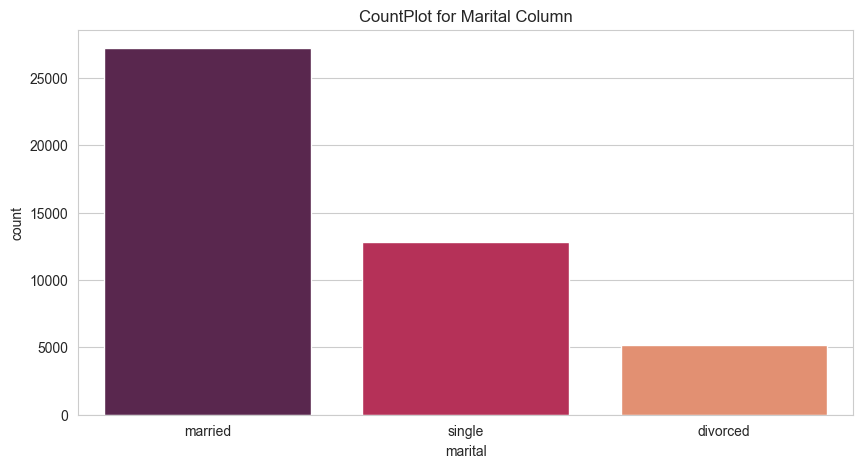

In [405]:
plt.figure(figsize=(10,5))
sns.set_style('whitegrid')
sns.countplot(x=df['marital'], palette='rocket')
plt.title('CountPlot for Marital Column')
df['marital'].value_counts()

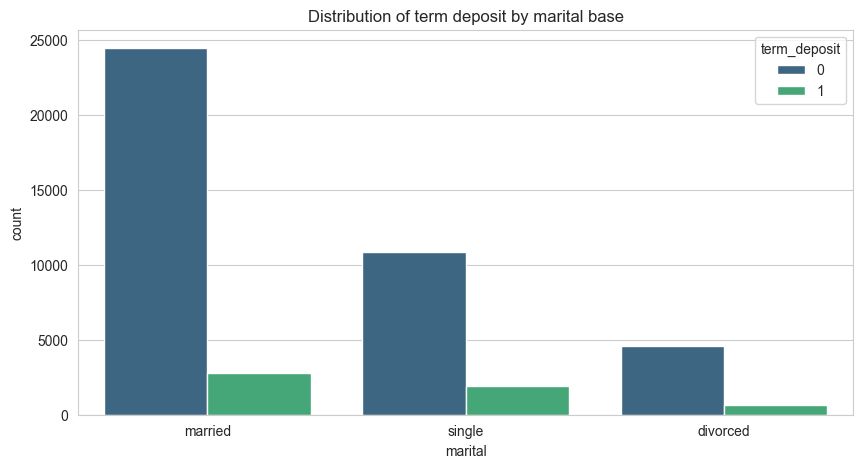

In [406]:
## Number of term deposit by marital base
plt.figure(figsize=(10,5))
sns.countplot(x='marital',hue='term_deposit',data=df, palette='viridis')
plt.title('Distribution of term deposit by marital base')
plt.show()

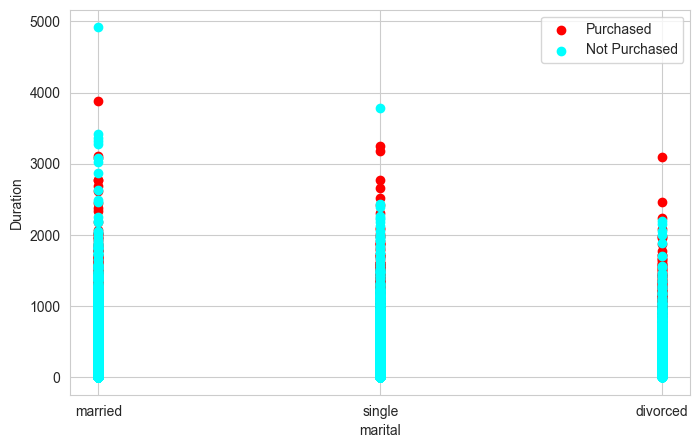

In [407]:
plt.figure(figsize=(8,5))
plt.scatter(x=df.marital[df.term_deposit==1],y=df.duration[df.term_deposit==1],c='red')
plt.scatter(x=df.marital[df.term_deposit==0],y=df.duration[df.term_deposit==0],c='cyan')
plt.legend(['Purchased' , 'Not Purchased'])
plt.xlabel('marital')
plt.ylabel('Duration')
plt.show()

In [408]:
## Percentage distribution of marital by term deposit
df.groupby(['marital'])['term_deposit'].mean()*100

marital
divorced    11.945458
married     10.123466
single      14.949179
Name: term_deposit, dtype: float64

### Education Column

education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

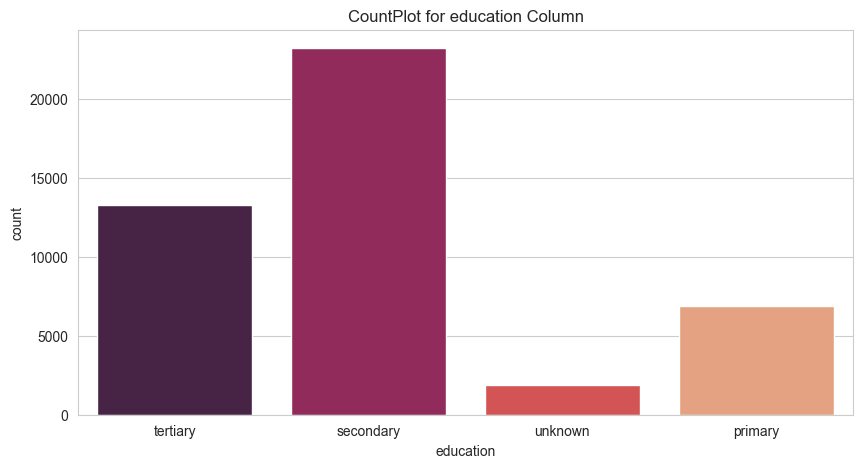

In [409]:
plt.figure(figsize=(10,5))
sns.set_style('whitegrid')
sns.countplot(x=df['education'], palette='rocket')
plt.title('CountPlot for education Column')
df['education'].value_counts()

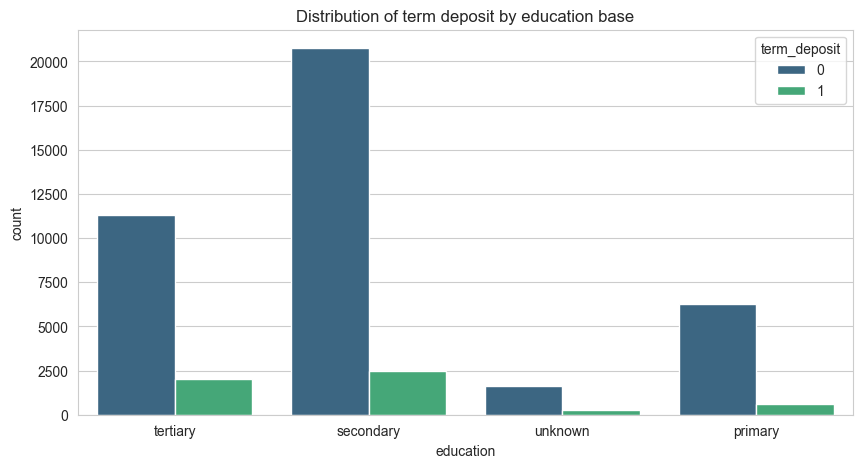

In [410]:
## Number of term deposit by education base
plt.figure(figsize=(10,5))
sns.countplot(x='education',hue='term_deposit',data=df, palette='viridis')
plt.title('Distribution of term deposit by education base')
plt.show()

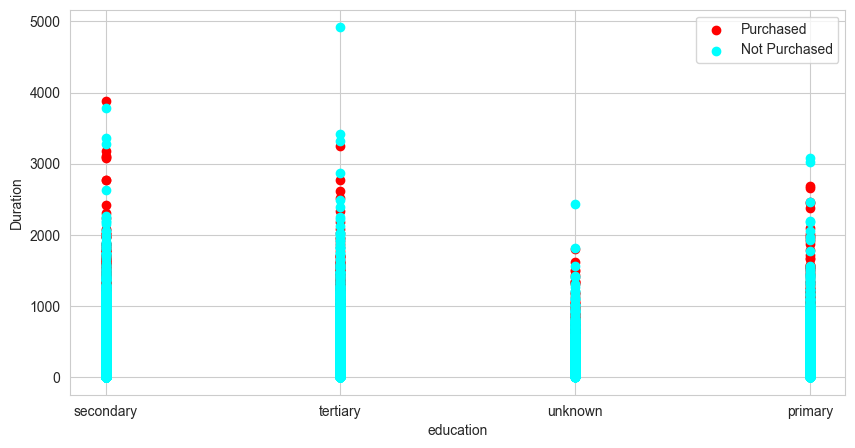

In [411]:
plt.figure(figsize=(10,5))
plt.scatter(x=df.education[df.term_deposit==1],y=df.duration[df.term_deposit==1],c='red')
plt.scatter(x=df.education[df.term_deposit==0],y=df.duration[df.term_deposit==0],c='cyan')
plt.legend(['Purchased' , 'Not Purchased'])
plt.xlabel('education')
plt.ylabel('Duration')
plt.show()

In [412]:
## Percentage distribution of education level by term deposit
df.groupby(['education'])['term_deposit'].mean()*100

education
primary       8.626478
secondary    10.559435
tertiary     15.006390
unknown      13.570275
Name: term_deposit, dtype: float64

In [413]:
df.sample()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,term_deposit
23890,37,management,married,tertiary,no,-9,no,no,cellular,29,aug,168,2,-1,0,unknown,0


### Loan Column

loan
no     37967
yes     7244
Name: count, dtype: int64

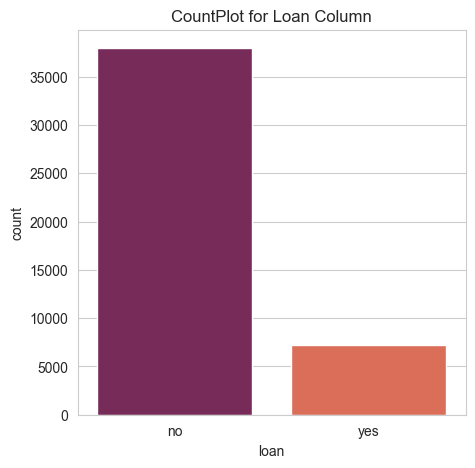

In [414]:
plt.figure(figsize=(5,5))
sns.set_style('whitegrid')
sns.countplot(x=df['loan'], palette='rocket')
plt.title('CountPlot for Loan Column')
df['loan'].value_counts()

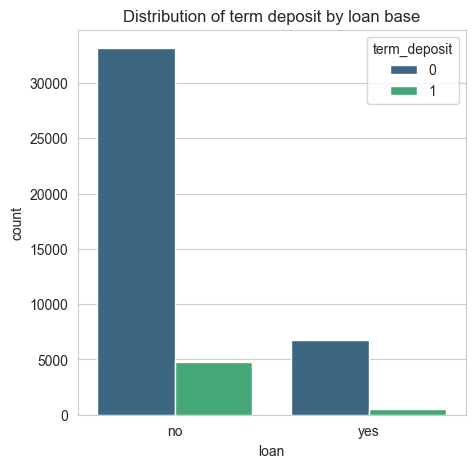

In [415]:
## Number of term deposit by loan base
plt.figure(figsize=(5,5))
sns.countplot(x='loan',hue='term_deposit',data=df, palette='viridis')
plt.title('Distribution of term deposit by loan base')
plt.show()

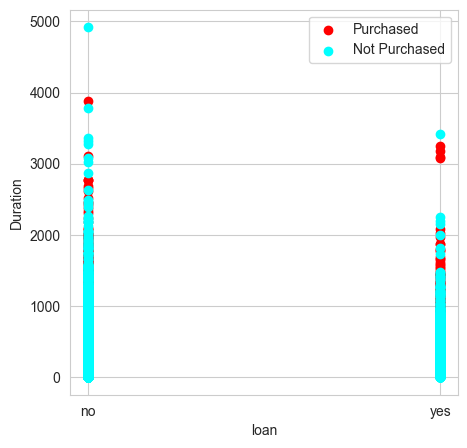

In [416]:
plt.figure(figsize=(5,5))
plt.scatter(x=df.loan[df.term_deposit==1],y=df.duration[df.term_deposit==1],c='red')
plt.scatter(x=df.loan[df.term_deposit==0],y=df.duration[df.term_deposit==0],c='cyan')
plt.legend(['Purchased' , 'Not Purchased'])
plt.xlabel('loan')
plt.ylabel('Duration')
plt.show()

In [417]:
## Percentage distribution of loan by term deposit
df.groupby(['loan'])['term_deposit'].mean()*100

loan
no     12.655727
yes     6.681391
Name: term_deposit, dtype: float64

### Housing Column

housing
yes    25130
no     20081
Name: count, dtype: int64

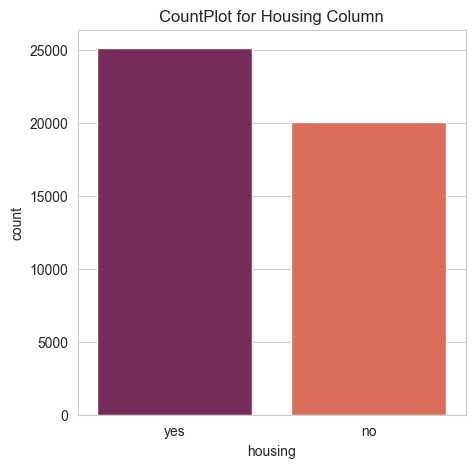

In [418]:
plt.figure(figsize=(5,5))
sns.set_style('whitegrid')
sns.countplot(x=df['housing'], palette='rocket')
plt.title('CountPlot for Housing Column')
df['housing'].value_counts()

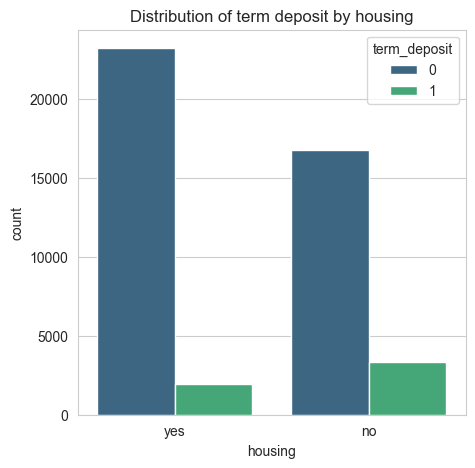

In [419]:
## Number of term deposit by housing
plt.figure(figsize=(5,5))
sns.countplot(x='housing',hue='term_deposit',data=df, palette='viridis')
plt.title('Distribution of term deposit by housing')
plt.show()

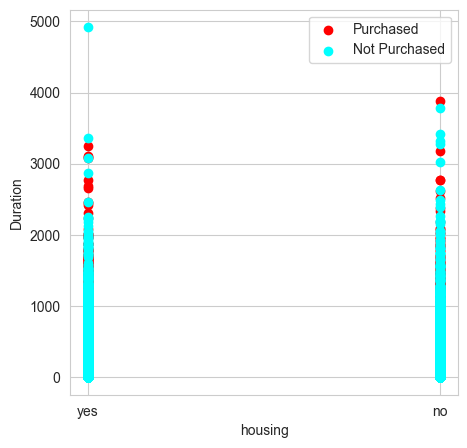

In [420]:
plt.figure(figsize=(5,5))
plt.scatter(x=df.housing[df.term_deposit==1],y=df.duration[df.term_deposit==1],c='red')
plt.scatter(x=df.housing[df.term_deposit==0],y=df.duration[df.term_deposit==0],c='cyan')
plt.legend(['Purchased' , 'Not Purchased'])
plt.xlabel('housing')
plt.ylabel('Duration')
plt.show()

In [421]:
## Percentage distribution of housing by term deposit
df.groupby(['housing'])['term_deposit'].mean()*100

housing
no     16.702355
yes     7.699960
Name: term_deposit, dtype: float64

## Data Overview

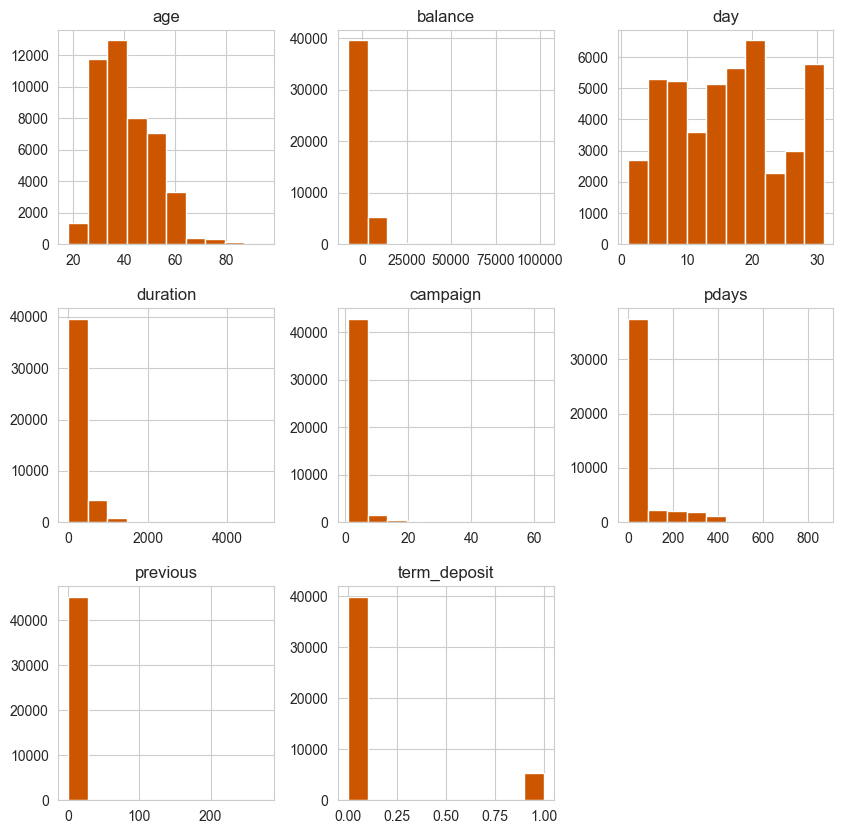

In [422]:
df.hist(figsize=(10,10),color='#cc5500')
plt.show()

In [423]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,term_deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


## Label Encoding

In [424]:
from sklearn.preprocessing import LabelEncoder
le_marital= LabelEncoder()
le_education= LabelEncoder()
le_job= LabelEncoder()
le_housing= LabelEncoder()
le_loan= LabelEncoder()

In [425]:
df['marital1']= le_marital.fit_transform(df['marital'])
df['education1']= le_education.fit_transform(df['education'])
df['job1']= le_job.fit_transform(df['job'])
df['housing1']= le_housing.fit_transform(df['housing'])
df['loan1']= le_loan.fit_transform(df['loan'])
df

,age,job,marital,education,default,balance,housing,loan,contact,day,...,campaign,pdays,previous,poutcome,term_deposit,marital1,education1,job1,housing1,loan1
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,1,-1,0,unknown,0,1,2,4,1,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,1,-1,0,unknown,0,2,1,9,1,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,1,-1,0,unknown,0,1,1,2,1,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,1,-1,0,unknown,0,1,3,1,1,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,1,-1,0,unknown,0,2,3,11,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,...,3,-1,0,unknown,1,1,2,9,0,0
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,...,2,-1,0,unknown,1,0,0,5,0,0
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,...,5,184,3,success,1,1,1,5,0,0
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,...,4,-1,0,unknown,0,1,1,1,0,0


In [426]:
# Dropping unnecessary categorical columns
df1=df.drop(columns=['job','marital','education','contact','poutcome','day','month','housing','loan','default'],axis=1)
df1

,age,balance,duration,campaign,pdays,previous,term_deposit,marital1,education1,job1,housing1,loan1
0,58,2143,261,1,-1,0,0,1,2,4,1,0
1,44,29,151,1,-1,0,0,2,1,9,1,0
2,33,2,76,1,-1,0,0,1,1,2,1,1
3,47,1506,92,1,-1,0,0,1,3,1,1,0
4,33,1,198,1,-1,0,0,2,3,11,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,977,3,-1,0,1,1,2,9,0,0
45207,71,1729,456,2,-1,0,1,0,0,5,0,0
45208,72,5715,1127,5,184,3,1,1,1,5,0,0
45209,57,668,508,4,-1,0,0,1,1,1,0,0


In [596]:
## showing correlation
df1.corr()

,age,balance,duration,campaign,pdays,previous,term_deposit,marital1,education1,job1,housing1,loan1
age,1.000000,0.097783,-0.004648,0.004760,-0.023758,0.001288,0.025155,-0.403240,-0.106807,-0.021868,-0.185513,-0.015655
balance,0.097783,1.000000,0.021560,-0.014578,0.003435,0.016674,0.052838,0.002122,0.064514,0.018232,-0.068768,-0.084350
duration,-0.004648,0.021560,1.000000,-0.084570,-0.001565,0.001203,0.394521,0.011852,0.001935,0.004744,0.005075,-0.012412
campaign,0.004760,-0.014578,-0.084570,1.000000,-0.088628,-0.032855,-0.073172,-0.008994,0.006255,0.006839,-0.023599,0.009980
pdays,-0.023758,0.003435,-0.001565,-0.088628,1.000000,0.454820,0.103621,0.019172,0.000052,-0.024455,0.124178,-0.022754
previous,0.001288,0.016674,0.001203,-0.032855,0.454820,1.000000,0.093236,0.014973,0.017570,-0.000911,0.037076,-0.011043
term_deposit,0.025155,0.052838,0.394521,-0.073172,0.103621,0.093236,1.000000,0.045588,0.066241,0.040438,-0.139173,-0.068185
marital1,-0.403240,0.002122,0.011852,-0.008994,0.019172,0.014973,0.045588,1.000000,0.108576,0.062045,-0.016096,-0.046893
education1,-0.106807,0.064514,0.001935,0.006255,0.000052,0.017570,0.066241,0.108576,1.000000,0.166707,-0.090790,-0.048574
job1,-0.021868,0.018232,0.004744,0.006839,-0.024455,-0.000911,0.040438,0.062045,0.166707,1.000000,-0.125363,-0.033004


<Axes: >

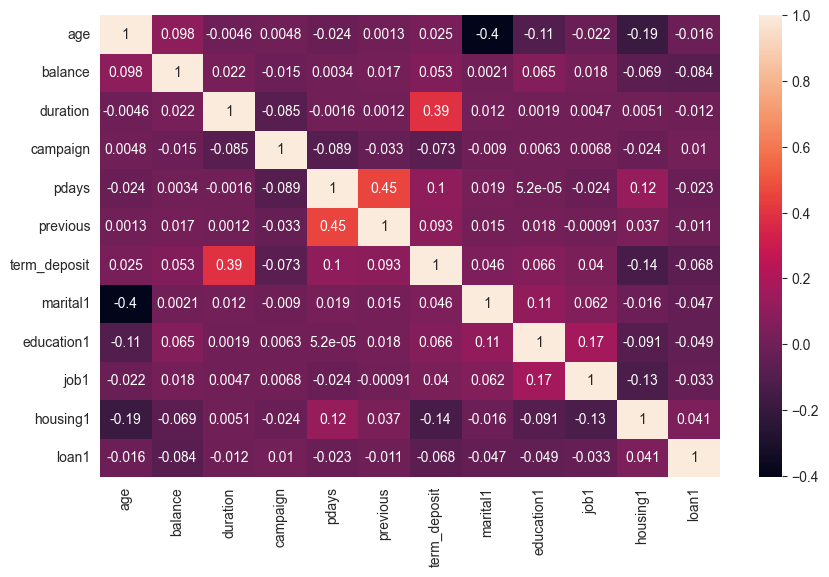

In [595]:
#showing correlation matrix as a heatmap
plt.figure(figsize=(10,6))
corr=df1.corr()
sns.heatmap(corr,annot=True)

In [469]:
#importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,precision_score,recall_score

In [483]:
x=df1.drop(columns=['term_deposit'])
x

,age,balance,duration,campaign,pdays,previous,marital1,education1,job1,housing1,loan1
0,58,2143,261,1,-1,0,1,2,4,1,0
1,44,29,151,1,-1,0,2,1,9,1,0
2,33,2,76,1,-1,0,1,1,2,1,1
3,47,1506,92,1,-1,0,1,3,1,1,0
4,33,1,198,1,-1,0,2,3,11,0,0
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,977,3,-1,0,1,2,9,0,0
45207,71,1729,456,2,-1,0,0,0,5,0,0
45208,72,5715,1127,5,184,3,1,1,5,0,0
45209,57,668,508,4,-1,0,1,1,1,0,0


In [431]:
y=df['term_deposit']
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: term_deposit, Length: 45211, dtype: int64

In [432]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

## Logistic Regression

In [433]:
Lor=LogisticRegression()
Lor.fit(x_train,y_train)

C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [434]:
Lor.score(x_test,y_test)*100

89.01913081941834

In [435]:
train_score = Lor.score(x_train,y_train)
print(train_score)

test_score = Lor.score(x_test,y_test)
print(test_score)

0.8877737226277372
0.8901913081941834


In [436]:
print(classification_report(y_test,Lor.predict(x_test)))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7994
           1       0.58      0.19      0.28      1049

    accuracy                           0.89      9043
   macro avg       0.74      0.59      0.61      9043
weighted avg       0.87      0.89      0.86      9043



In [437]:
print(confusion_matrix(y_test,Lor.predict(x_test)))

[[7853  141]
 [ 852  197]]


## Using DecisionTreeClassifier

In [465]:
DTC = DecisionTreeClassifier()
DTC.fit(x_train,y_train)

DecisionTreeClassifier()

In [466]:
# Test Data  

y_pred = DTC.predict(x_test)

print(f"Confusion Matrix =\n",confusion_matrix(y_test,y_pred))
print("--------------------------------------------------")
print(f"Accuracy Score = {accuracy_score(y_test,y_pred)}")
print("--------------------------------------------------")
print(f"Classification report= \n{classification_report(y_test,y_pred)}")

Confusion Matrix =
 [[7291  703]
 [ 591  458]]
--------------------------------------------------
Accuracy Score = 0.8569058940617051
--------------------------------------------------
Classification report= 
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      7994
           1       0.39      0.44      0.41      1049

    accuracy                           0.86      9043
   macro avg       0.66      0.67      0.67      9043
weighted avg       0.86      0.86      0.86      9043



In [467]:
# Train Data  

y_pred = DTC.predict(x_train)

print(f"Confusion Matrix =\n",confusion_matrix(y_train,y_pred))
print("--------------------------------------------------")
print(f"Accuracy Score = {accuracy_score(y_train,y_pred)}")
print("--------------------------------------------------")
print(f"Classification report= \n{classification_report(y_train,y_pred)}")

Confusion Matrix =
 [[31928     0]
 [    0  4240]]
--------------------------------------------------
Accuracy Score = 1.0
--------------------------------------------------
Classification report= 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     31928
           1       1.00      1.00      1.00      4240

    accuracy                           1.00     36168
   macro avg       1.00      1.00      1.00     36168
weighted avg       1.00      1.00      1.00     36168



## Randoimisezed search

In [470]:
 DC= DecisionTreeClassifier(min_samples_split =  15,min_samples_leaf =  16,max_depth=3,criterion='gini')

In [471]:
DC.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=16, min_samples_split=15)

In [472]:
# Testing Data Evaluation 

y_pred = DC.predict(x_test)

cm = confusion_matrix(y_test,y_pred)
print(f"Confusion Matrix =\n",cm)
print("*"*50)
ac = accuracy_score(y_test,y_pred)
print(f"Accuracy Score = {ac}")
print("*"*50)
cr = classification_report(y_test,y_pred)
print(f"Classification report= \n{cr}")

Confusion Matrix =
 [[7774  220]
 [ 792  257]]
**************************************************
Accuracy Score = 0.8880902355413026
**************************************************
Classification report= 
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7994
           1       0.54      0.24      0.34      1049

    accuracy                           0.89      9043
   macro avg       0.72      0.61      0.64      9043
weighted avg       0.86      0.89      0.87      9043



In [473]:
# Training Data Evaluation 

y_pred = DC.predict(x_train)

cm = confusion_matrix(y_train,y_pred)
print(f"Confusion Matrix =\n",cm)
print("*"*50)
ac = accuracy_score(y_train,y_pred)
print(f"Accuracy Score = {ac}")
print("*"*50)
cr = classification_report(y_train,y_pred)
print(f"Classification report= \n{cr}")

Confusion Matrix =
 [[31119   809]
 [ 3169  1071]]
**************************************************
Accuracy Score = 0.8900132714001328
**************************************************
Classification report= 
              precision    recall  f1-score   support

           0       0.91      0.97      0.94     31928
           1       0.57      0.25      0.35      4240

    accuracy                           0.89     36168
   macro avg       0.74      0.61      0.64     36168
weighted avg       0.87      0.89      0.87     36168



In [591]:
x.columns

Index(['age', 'balance', 'duration', 'campaign', 'pdays', 'previous',
       'marital1', 'education1', 'job1', 'housing1', 'loan1'],
      dtype='object')

In [592]:
l1=['age', 'balance', 'duration', 'campaign', 'pdays', 'previous',
       'marital1', 'education1', 'job1', 'housing1', 'loan1']

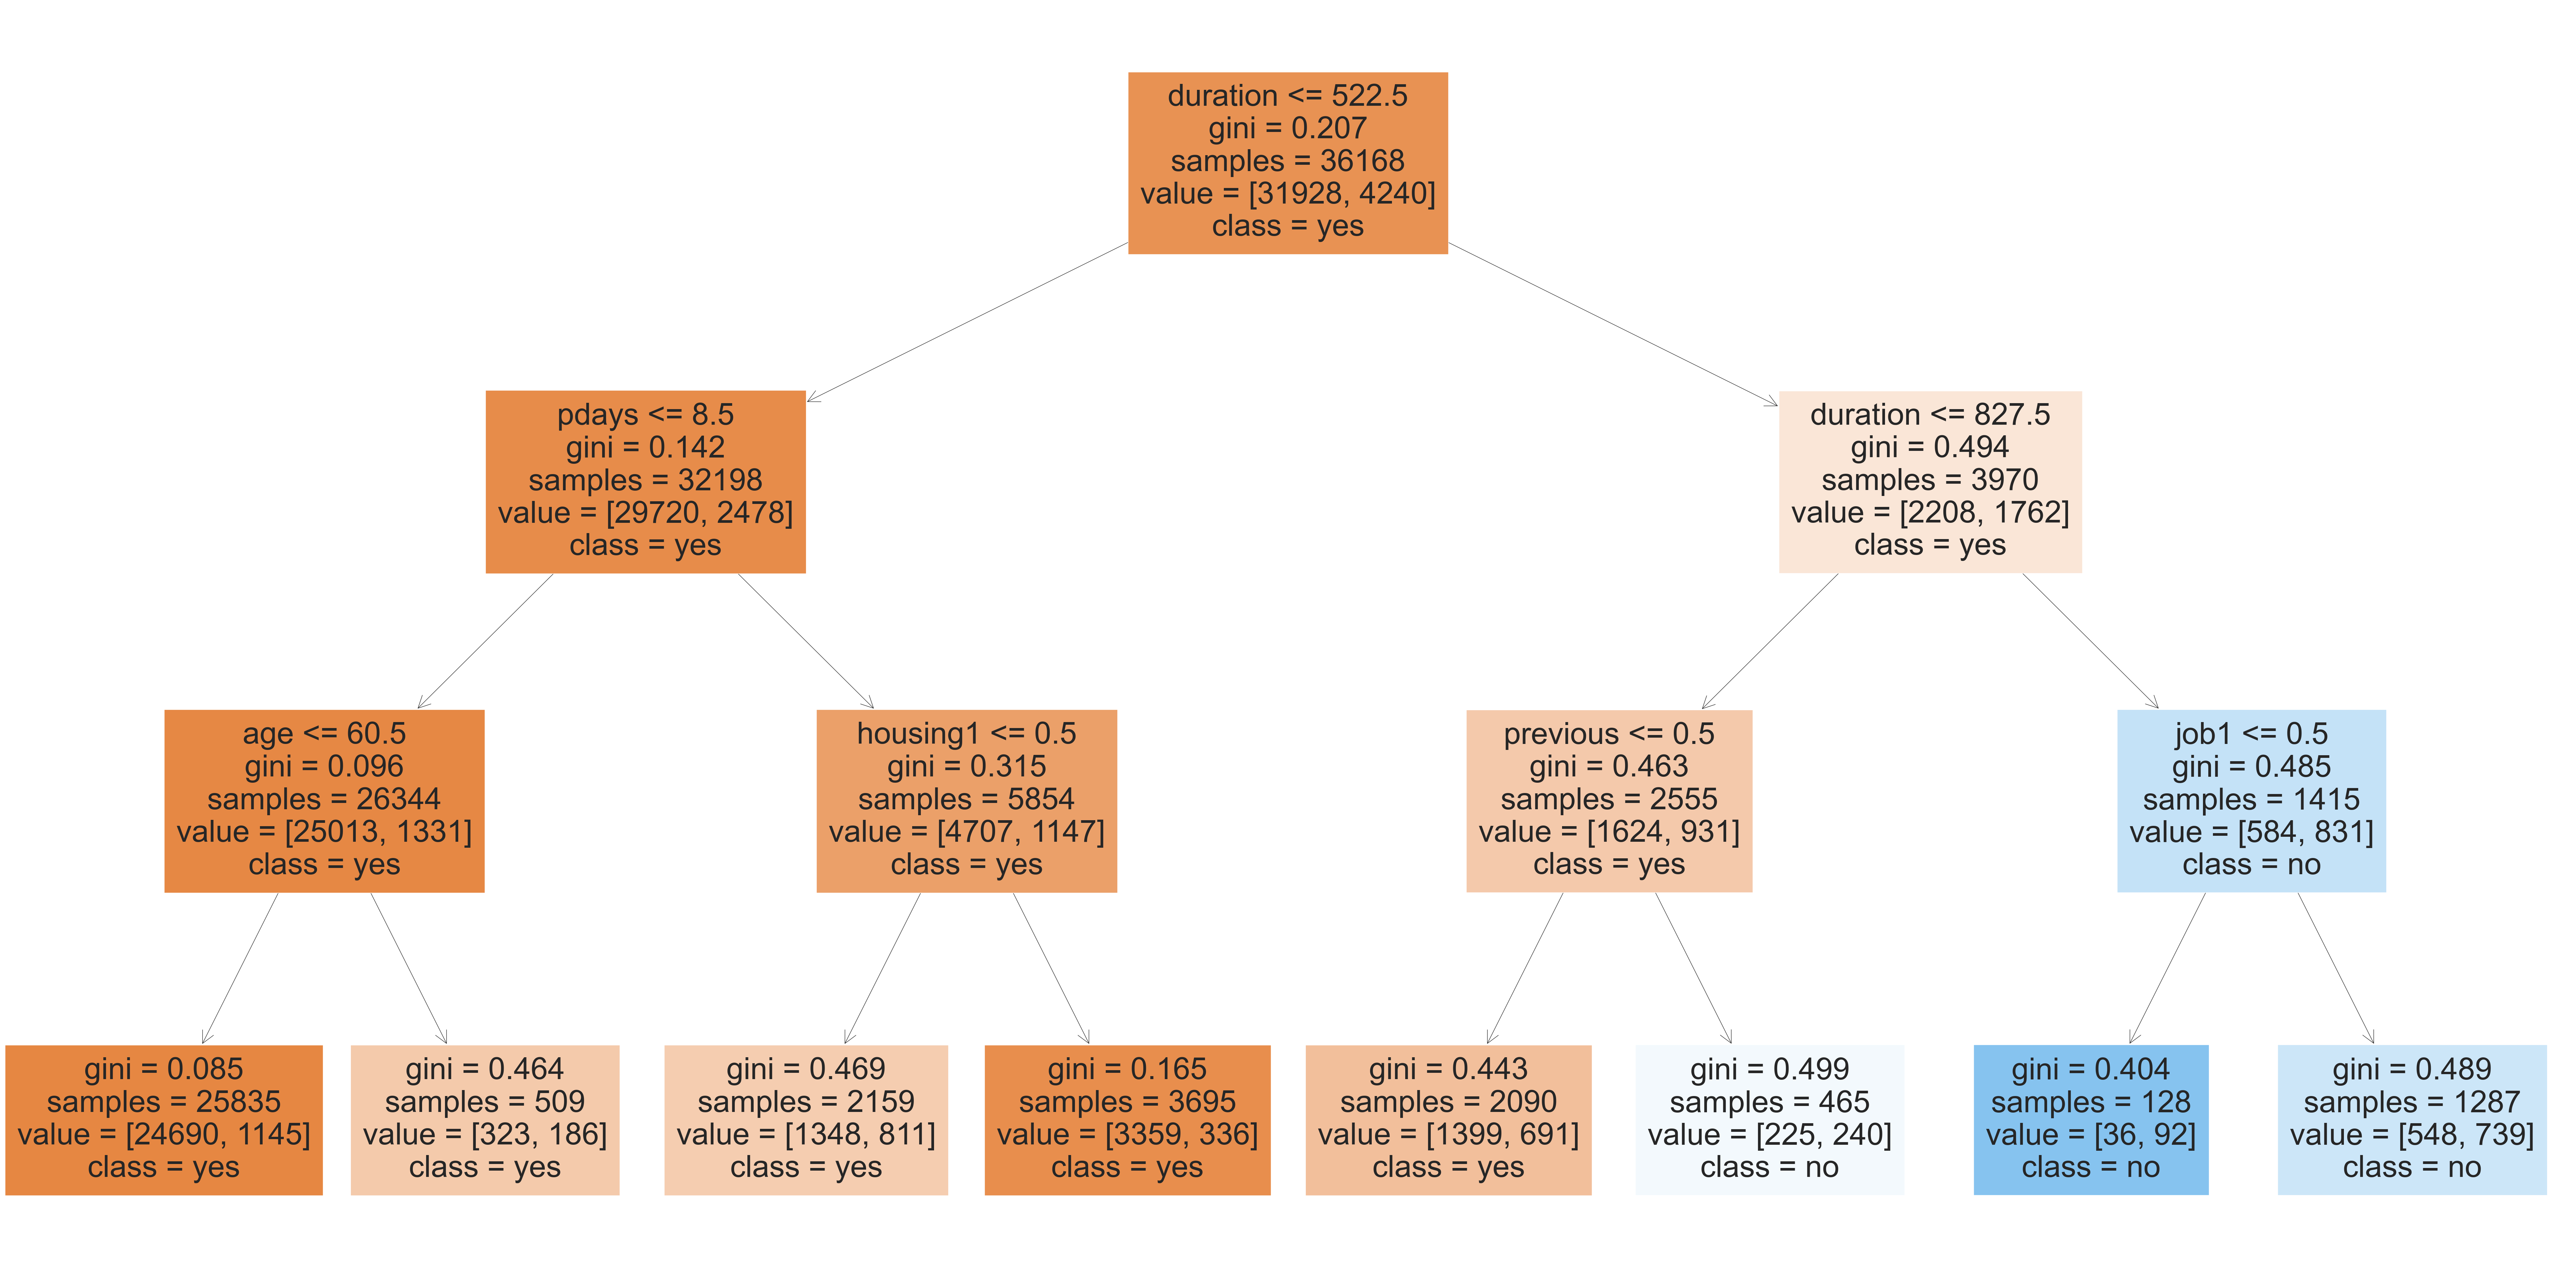

In [580]:
plt.figure(figsize=(100,50))
tree_fig = plot_tree(DC, feature_names=x.columns, filled=True, class_names=['yes','no'])

## Decision Tree using entropy criteria

In [583]:
def eval_model(y_test,y_pred):
    acc = accuracy_score(y_test,y_pred)
    print('Accuracy_Score',acc)
    cm = confusion_matrix(y_test,y_pred)
    print('Confusion Matrix\n',cm)
    print('Classification Report\n',classification_report(y_test,y_pred))

def mscore(model):
    train_score = model.score(x_train,y_train)
    test_score = model.score(x_test,y_test)
    print('Training Score',train_score)  # Training Accuracy
    print('Testing Score',test_score)    # Testing Accuracy

In [581]:
# Building Decision Tree Classifier Model
dt1 = DecisionTreeClassifier(criterion='entropy',max_depth=4,min_samples_split=15)
dt1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=15)

In [584]:
# Evaluating training and testing accuracy
mscore(dt1)

Training Score 0.8929440389294404
Testing Score 0.8906336392790003


In [585]:
# Generating prediction
ypred_dt1 = dt1.predict(x_test)

In [586]:
# Evaluate the model - confusion matrix, classification Report, Accuaracy
eval_model(y_test,ypred_dt1)

Accuracy_Score 0.8906336392790003
Confusion Matrix
 [[7800  194]
 [ 795  254]]
Classification Report
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      7994
           1       0.57      0.24      0.34      1049

    accuracy                           0.89      9043
   macro avg       0.74      0.61      0.64      9043
weighted avg       0.87      0.89      0.87      9043



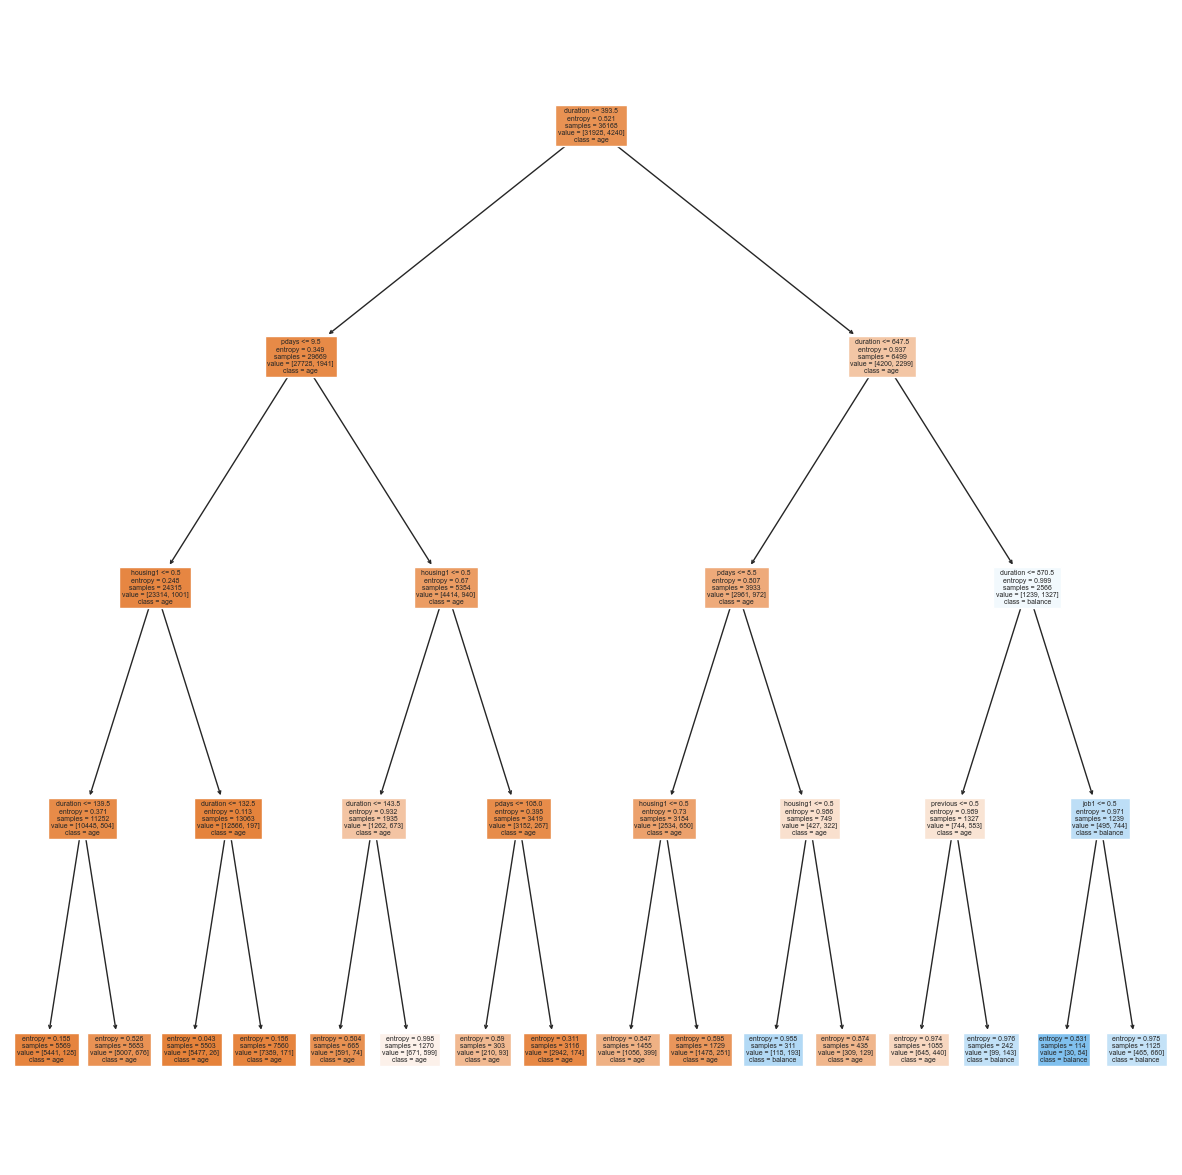

In [594]:
plt.figure(figsize=(15,15))
plot_tree(dt1,feature_names=l1,class_names=l1,filled=True)
plt.show()

## Conclusion

The given bank marketing dataset, which is sample dataset of the original dataset. This dataset contains 45211 rows and 17 columns. There is one target variable term_deposit which implies whether the client has taken term deposit or not. The classification goal of this task is to predict if the client will subscribe (yes/no) a term deposit (term_deposit) variable. After performing data cleaning, data preprocessing and feature selection along with train-test split, the Decision Tree Classifier model has been built and evaluated the accuracy of the model which is around 89 % using both the criterion (gini) and entropy. This accuracy score is high and the model is good for this dataset.